<a href="https://colab.research.google.com/github/antoniogss/web_scrapping/blob/main/twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import google.colab as gc

In [130]:
!pip3 install snscrape
gc.output.clear()
import snscrape as sns
import snscrape.modules.twitter as sntw

In [167]:
maxTweets = 10000
i = 0
tweets_list = []
for tweet in sntw.TwitterSearchScraper('Universidade Pública since:2022-10-02 until:2022-12-02').get_items():
  if i > maxTweets:
    break
  tweets_list.append([tweet.date, tweet.url, tweet.user.username, tweet.content])
  i = i + 1

In [168]:
# tweets_list

In [169]:
df = pd.DataFrame(tweets_list,columns=['date','url','username','content'])

In [170]:
# df.head()

In [171]:
import nltk
from nltk.tokenize import word_tokenize 
nltk.download('punkt')
nltk.download('stopwords')
from wordcloud import WordCloud, STOPWORDS
gc.output.clear()

In [172]:
stop_words = nltk.corpus.stopwords.words('portuguese')
stop_words = stop_words + list([ ',','.','https', ':','!', '#', '@', '?', '/', 
                                'O', 'vai', '|', '–','pra', 'a', 'e', '-', 't', 
                                'CO', 'C0', 'co', 'sobre'])

In [173]:
def remove_stopwords(x):
  word_tokens = nltk.word_tokenize(x)
  filtered_sentence = ' '.join([w for w in word_tokens if not (w in stop_words or len(w)<4)]) 
  return filtered_sentence

In [174]:
df['filtered_text'] = df['content'].apply(lambda x: remove_stopwords(x))

In [175]:
df['filtered_text'].head()

0          agradecer porra termos universidade pública
1    desses discursos formatura sonho universidade ...
2    aestela_haddad Parabéns Estela viva universida...
3    viniciusperes_ Preconceito amigo dialoga pesso...
4    SenadoFederal Algum senador visitar alguma uni...
Name: filtered_text, dtype: object

In [176]:
string = pd.Series(df['filtered_text'].values).str.cat(sep=' ')
# string

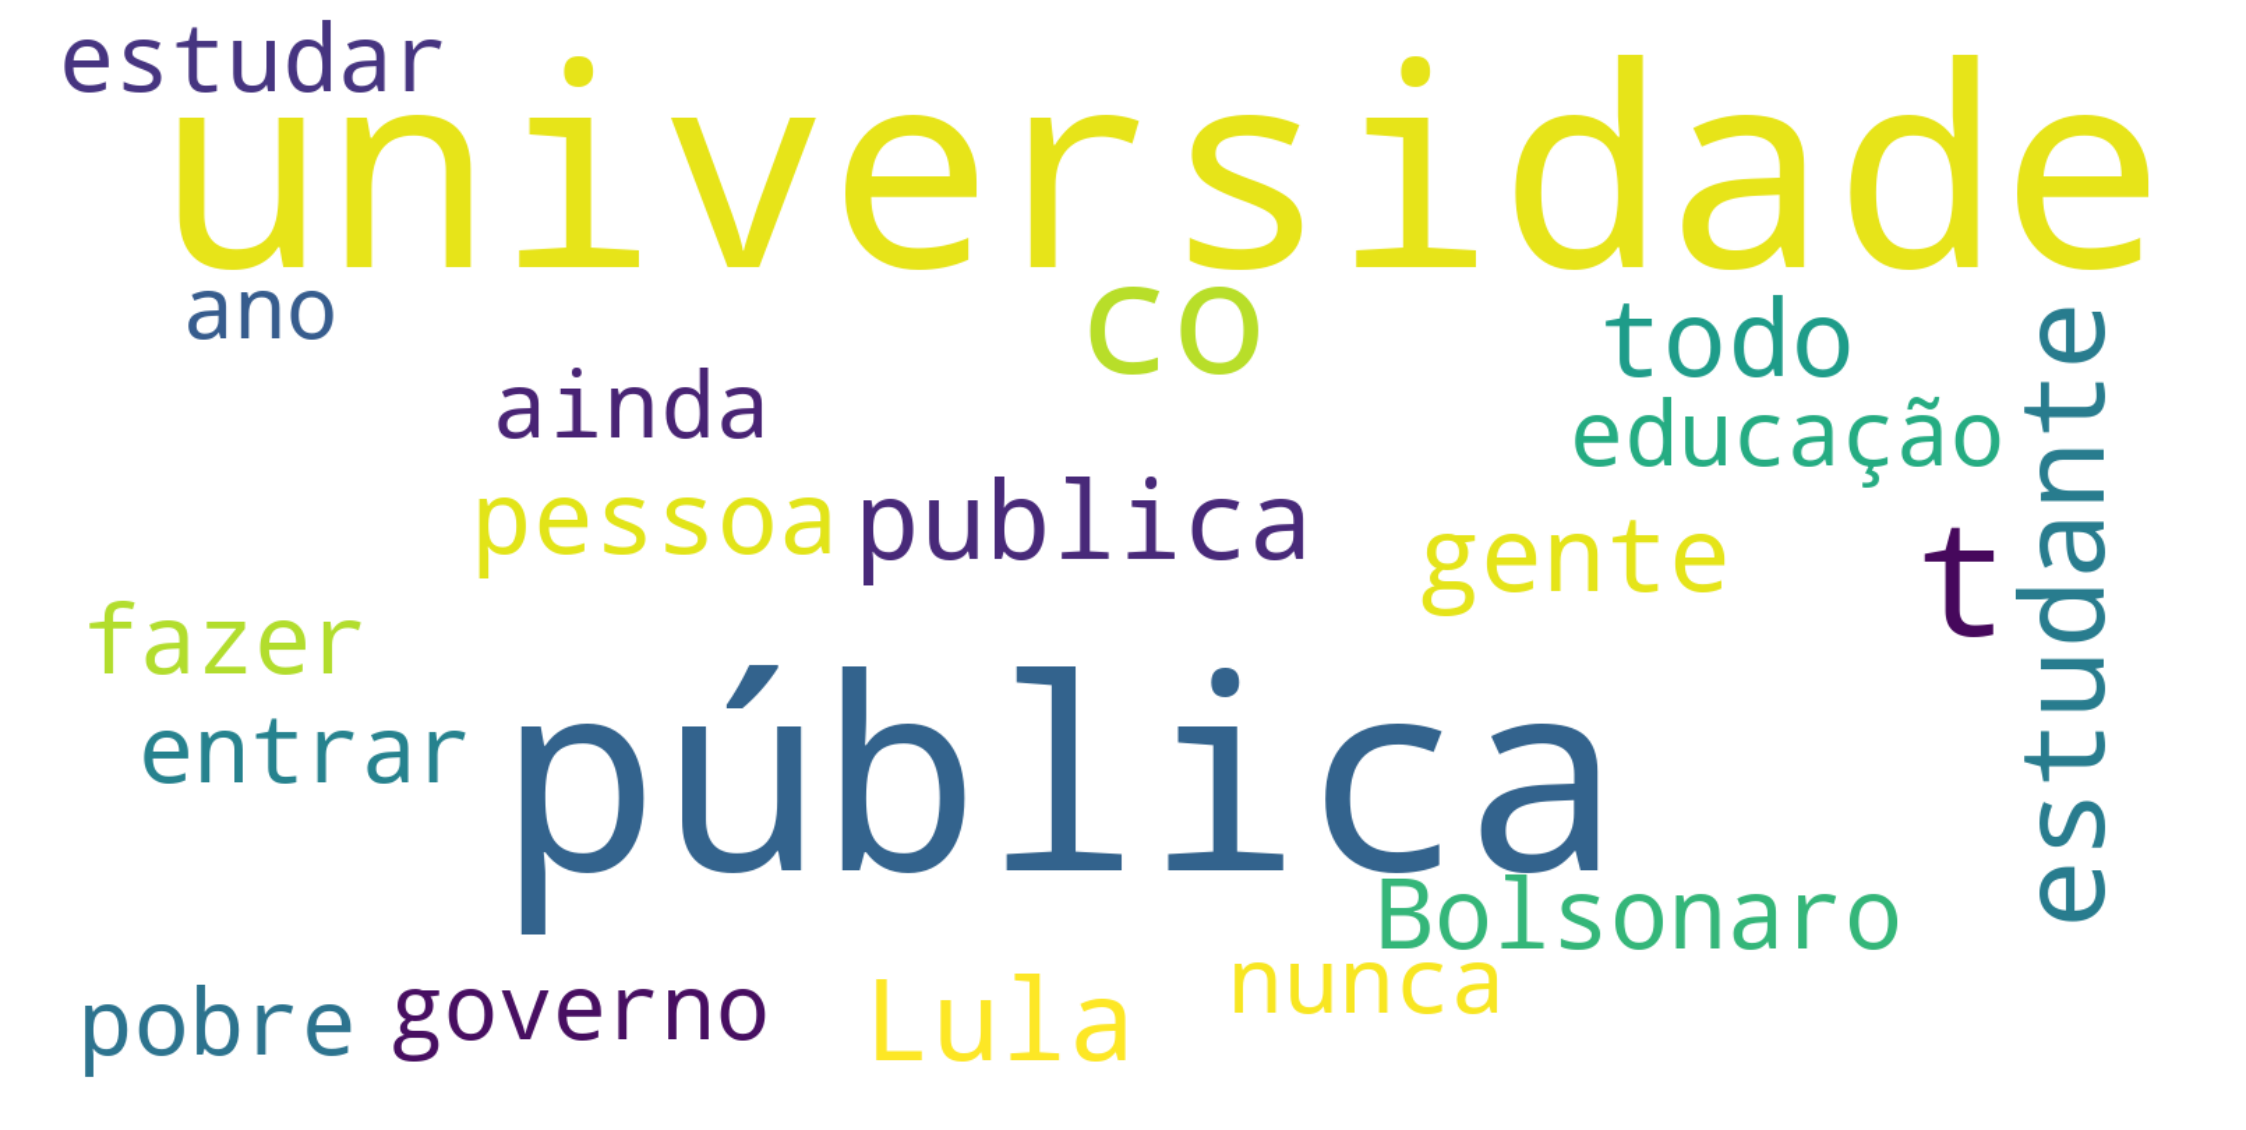

In [177]:
wordcloud = WordCloud(width=1600,height=800,max_font_size=200,
                      max_words=20,collocations=False, 
                      background_color='white').generate(string)
                      
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [178]:
pd.Series(' '.join(df['filtered_text'].str.lower()).split()).value_counts()[:20]

universidade    10559
pública          9720
lula              780
publica           725
gente             678
bolsonaro         579
fazer             570
entrar            535
estudar           530
estudante         515
nunca             510
ainda             505
educação          494
governo           452
anos              436
hoje              420
porque            420
pobre             410
tudo              395
passar            376
dtype: int64